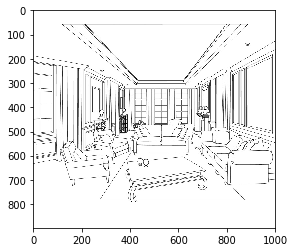

In [1]:
%matplotlib inline
from PIL import Image 
import matplotlib.pyplot as plt

filename = '../data/260342-1503260G31079.jpg'

image = Image.open(filename)
plt.imshow(image)


In [2]:
import cv2 as cv 

image = cv.imread(filename)

#image = cv.resize(image,None,fx=0.2, fy=0.2, interpolation = cv.INTER_CUBIC)

#OR

# height, width = img.shape[:2]
# res = cv.resize(img,(2*width, 2*height), interpolation = cv2.INTER_CUBIC)

In [5]:
import cv2 as cv  
import numpy as np  

%matplotlib inline
#image=np.zeros([400,400,3],np.uint8) 


def fill_color_demo(image):  
    """ 
    漫水填充：会改变图像 
    """  
  
    #复制图片  
    copyImg=image.copy()  
    #获取图片的高和宽  
    h,w =image.shape[:2] 
  
    #创建一个h+2,w+2的遮罩层，  
    #这里需要注意，OpenCV的默认规定，  
    # 遮罩层的shape必须是h+2，w+2并且必须是单通道8位，具体原因我也不是很清楚。  
    mask=np.zeros([h+2,w+2],np.uint8)  
  
    #这里执行漫水填充，参数代表：  
    #copyImg：要填充的图片  
    #mask：遮罩层  
    #(30,30)：开始填充的位置（开始的种子点）  
    #(0,255,255)：填充的值，这里填充成黄色  
    #(100,100,100)：开始的种子点与整个图像的像素值的最大的负差值  
    #(50,50,50)：开始的种子点与整个图像的像素值的最大的正差值  
    #cv.FLOODFILL_FIXED_RANGE：处理图像的方法，一般处理彩色图象用这个方法  
    cv.floodFill(copyImg,mask,(768, 458),(99, 104, 69),(100,100,100),(50,50,50),cv.FLOODFILL_FIXED_RANGE)  
    cv.imshow("fill color",copyImg)  
    cv.waitKey(0)
    cv.destroyAllWindows()

  
def fill_binary_demo():  
    """ 
    二值填充：不改变图像，只填充遮罩层本身，忽略新的颜色值参数 
    """  
  
    #创建一个400*400的3通道unit8图片  
    image=np.zeros([400,400,3],np.uint8)  
    #将图片的中间区域变为白色  
    image[100:300,100:300,:]=255  
  
    cv.imshow("fill color",image)  
  
    mask=np.ones([402,402,1],np.uint8)  
    #将遮罩层变为黑色  
    mask[101:301,101:301]=0  
    #在图像的中间填充，颜色为红色，用FLOODFILL_MASK_ONLY方法填充  
    cv.floodFill(image,mask,(200,200),(99, 104, 69),cv.FLOODFILL_MASK_ONLY)  
    cv.imshow("filled",image)  

#fill_binary_demo()




In [ ]:
fill_color_demo(image)

In [4]:
def floodfill(x, y, oldColor, newColor):

    # assume surface is a 2D image and surface[x][y] is the color at x, y.

    if surface[x][y] != oldColor: # the base case

        return

    surface[x][y] = newColor

    floodfill(x + 1, y, oldColor, newColor) # right

    floodfill(x - 1, y, oldColor, newColor) # left

    floodfill(x, y + 1, oldColor, newColor) # down

    floodfill(x, y - 1, oldColor, newColor) # up